In [26]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
df=pd.read_excel('/content/Final_nft_data.xlsx')

In [28]:
df

,Unnamed: 0,tweets,likes,Date,Time
0,1,@DeanSteinerNFT https://t.co/w8u8lbQPA5\n🚀\n#n...,0,2022-03-17,12:10:22+00:00
1,2,🖤🖤🖤🔥🖤🖤🖤 https://t.co/3529JnXvPJ,0,2022-03-17,12:10:21+00:00
2,3,@perfectstaking @soon_labs @Green_NFTs So I ne...,0,2022-03-17,12:10:21+00:00
3,4,@GhostGang_NFTs Thanks for doing this giveaway...,0,2022-03-17,12:10:21+00:00
4,5,Check out my new NFT on OpenSea! https://t.co/...,0,2022-03-17,12:10:21+00:00
...,...,...,...,...,...
3605,3606,@windsof85994458 That is what the EU establish...,0,2022-03-04,09:14:36+00:00
3606,3607,@akcz26 many things ser,15,2022-03-04,09:12:59+00:00
3607,3608,4/ There is a background concern that this wil...,49,2022-03-04,08:44:12+00:00
3608,3609,3/ SWIFT disconnections are inconvenient but t...,39,2022-03-04,08:44:10+00:00


In [29]:
df.head()

,Unnamed: 0,tweets,likes,Date,Time
0,1,@DeanSteinerNFT https://t.co/w8u8lbQPA5\n🚀\n#n...,0,2022-03-17,12:10:22+00:00
1,2,🖤🖤🖤🔥🖤🖤🖤 https://t.co/3529JnXvPJ,0,2022-03-17,12:10:21+00:00
2,3,@perfectstaking @soon_labs @Green_NFTs So I ne...,0,2022-03-17,12:10:21+00:00
3,4,@GhostGang_NFTs Thanks for doing this giveaway...,0,2022-03-17,12:10:21+00:00
4,5,Check out my new NFT on OpenSea! https://t.co/...,0,2022-03-17,12:10:21+00:00


In [30]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
  text= re.sub('@[A-Za-z0-9]+' , '', text)
  text= re.sub('#', '',text)
  text= re.sub('https?:\/\/\$' ,'',text)
  return text

 #Cleaning the text
df['tweets']= df['tweets'].apply(cleanTxt)
df

,Unnamed: 0,tweets,likes,Date,Time
0,1,https://t.co/w8u8lbQPA5\n🚀\nnftcollectibles n...,0,2022-03-17,12:10:22+00:00
1,2,🖤🖤🖤🔥🖤🖤🖤 https://t.co/3529JnXvPJ,0,2022-03-17,12:10:21+00:00
2,3,_labs _NFTs So I need as much guiding as the ...,0,2022-03-17,12:10:21+00:00
3,4,"_NFTs Thanks for doing this giveaway, i hope i...",0,2022-03-17,12:10:21+00:00
4,5,Check out my new NFT on OpenSea! https://t.co/...,0,2022-03-17,12:10:21+00:00
...,...,...,...,...,...
3605,3606,That is what the EU establishment likes to te...,0,2022-03-04,09:14:36+00:00
3606,3607,many things ser,15,2022-03-04,09:12:59+00:00
3607,3608,4/ There is a background concern that this wil...,49,2022-03-04,08:44:12+00:00
3608,3609,3/ SWIFT disconnections are inconvenient but t...,39,2022-03-04,08:44:10+00:00


In [31]:
#Creating a fuction to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creating a fuction to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Creating two new columns for subjectivity and polarity
df['Subjectivity']= df['tweets'].apply(getSubjectivity)
df['Polarity']= df['tweets'].apply(getPolarity)

df

,Unnamed: 0,tweets,likes,Date,Time,Subjectivity,Polarity
0,1,https://t.co/w8u8lbQPA5\n🚀\nnftcollectibles n...,0,2022-03-17,12:10:22+00:00,0.000000,0.000000
1,2,🖤🖤🖤🔥🖤🖤🖤 https://t.co/3529JnXvPJ,0,2022-03-17,12:10:21+00:00,0.000000,0.000000
2,3,_labs _NFTs So I need as much guiding as the ...,0,2022-03-17,12:10:21+00:00,0.400000,0.325000
3,4,"_NFTs Thanks for doing this giveaway, i hope i...",0,2022-03-17,12:10:21+00:00,0.483333,0.383333
4,5,Check out my new NFT on OpenSea! https://t.co/...,0,2022-03-17,12:10:21+00:00,0.454545,0.170455
...,...,...,...,...,...,...,...
3605,3606,That is what the EU establishment likes to te...,0,2022-03-04,09:14:36+00:00,0.466667,-0.133333
3606,3607,many things ser,15,2022-03-04,09:12:59+00:00,0.500000,0.500000
3607,3608,4/ There is a background concern that this wil...,49,2022-03-04,08:44:12+00:00,0.750000,0.300000
3608,3609,3/ SWIFT disconnections are inconvenient but t...,39,2022-03-04,08:44:10+00:00,1.000000,-0.600000


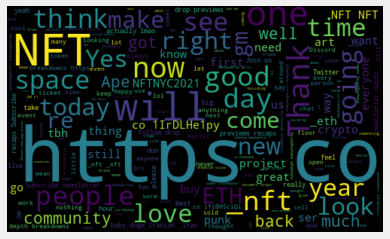

In [35]:
#Plotting the Word Cloud
allWords= ' '.join([twts for twts in df['tweets']])
wordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=100).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
#Creating a function to compute the negative, neutral and positive sentiments for NFT
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Unnamed: 0,tweets,likes,Date,Time,Subjectivity,Polarity,Analysis
0,1,https://t.co/w8u8lbQPA5\n🚀\nnftcollectibles n...,0,2022-03-17,12:10:22+00:00,0.000000,0.000000,Neutral
1,2,🖤🖤🖤🔥🖤🖤🖤 https://t.co/3529JnXvPJ,0,2022-03-17,12:10:21+00:00,0.000000,0.000000,Neutral
2,3,_labs _NFTs So I need as much guiding as the ...,0,2022-03-17,12:10:21+00:00,0.400000,0.325000,Positive
3,4,"_NFTs Thanks for doing this giveaway, i hope i...",0,2022-03-17,12:10:21+00:00,0.483333,0.383333,Positive
4,5,Check out my new NFT on OpenSea! https://t.co/...,0,2022-03-17,12:10:21+00:00,0.454545,0.170455,Positive
...,...,...,...,...,...,...,...,...
3605,3606,That is what the EU establishment likes to te...,0,2022-03-04,09:14:36+00:00,0.466667,-0.133333,Negative
3606,3607,many things ser,15,2022-03-04,09:12:59+00:00,0.500000,0.500000,Positive
3607,3608,4/ There is a background concern that this wil...,49,2022-03-04,08:44:12+00:00,0.750000,0.300000,Positive
3608,3609,3/ SWIFT disconnections are inconvenient but t...,39,2022-03-04,08:44:10+00:00,1.000000,-0.600000,Negative


In [ ]:
#Printing Positive tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['tweets'][i])
    print()
    j=j+1


In [ ]:
#Printing Negative tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['tweets'][i])
    print()
    j=j+1


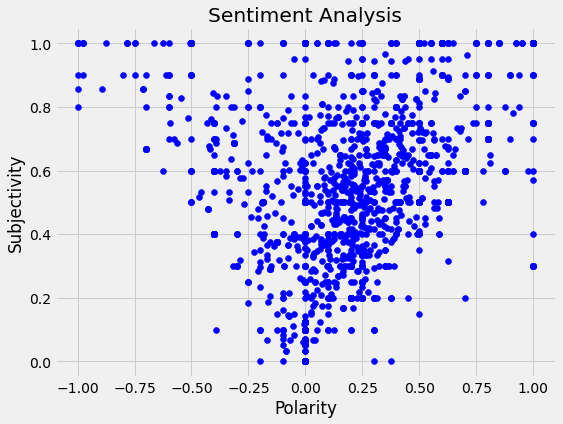

In [51]:
#Plotting Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

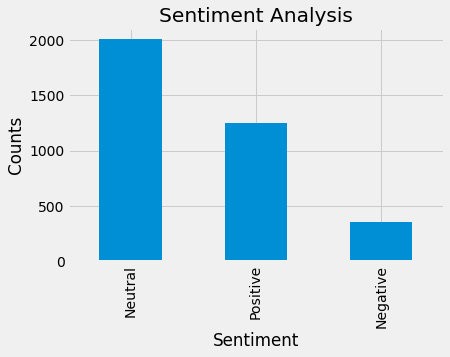

In [52]:
#Showing Value Counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()